In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../Resources/collision_2022_classified.csv')
df

C:\Windows\Temp\ipykernel_34704\50224331.py:1: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Resources/collision_2022_classified.csv')


,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor,number_of_deaths,number_of_injuries,death_rate,injuries_rate,severity_of_accident,month,year,day_of_week,hour
0,2022-03-26 11:45:00,5,Other Hours,Queensboro Bridge Upper,1,0,0,0,0,0,...,Pavement Slippery,0,2,0.0,0.000165,Serious,3,2022,Saturday,11
1,2022-06-29 06:55:00,2,Early Morning,Throgs Neck Bridge,0,0,0,0,0,0,...,Following Too Closely,0,0,0.0,0.000000,Light,6,2022,Wednesday,6
2,2022-06-29 16:00:00,2,Rush Hours,Williamsburg Bridge Outer Roadwa,1,0,0,0,0,0,...,Driver Inattention/Distraction,0,2,0.0,0.000030,Serious,6,2022,Wednesday,16
3,2022-07-12 17:50:00,1,Rush Hours,44 Empire Boulevard,0,0,0,0,0,0,...,Oversized Vehicle,0,0,0.0,0.000000,Light,7,2022,Tuesday,17
4,2022-03-23 10:00:00,2,Other Hours,71 East Drive,0,0,0,0,0,0,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,0.0,0.000000,Light,3,2022,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103784,2022-09-15 19:49:00,3,Rush Hours,East New York Avenue & Rockaway Parkway,0,0,0,0,0,0,...,Driver Inattention/Distraction,0,0,0.0,0.000000,Light,9,2022,Thursday,19
103785,2022-07-21 22:05:00,3,Late Night,Cross Island Parkway,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,22
103786,2022-12-31 02:00:00,5,Late Night,Tilden Avenue,1,0,0,0,0,0,...,Traffic Control Disregarded,0,2,0.0,0.000025,Serious,12,2022,Saturday,2
103787,2022-07-14 05:00:00,3,Early Morning,2501 Cortelyou Road,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,5


In [3]:
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])

C:\Windows\Temp\ipykernel_34704\4269510825.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


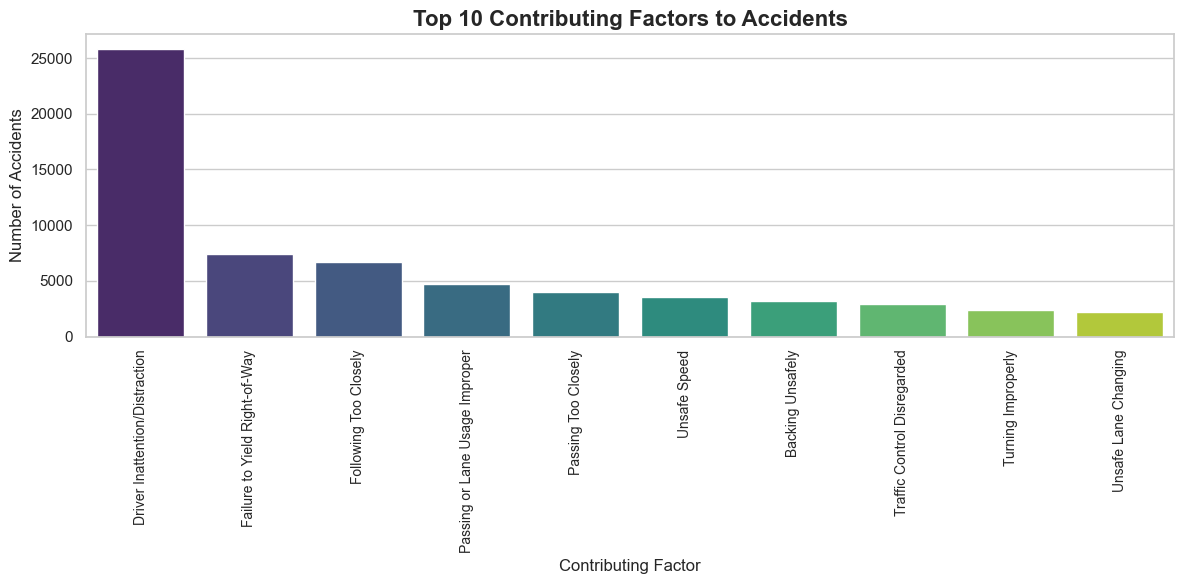

In [38]:
# Set the style of seaborn to 'whitegrid' for a clean background
sns.set_theme(style="whitegrid")

# Filter the dataframe to remove the 'Unspecified' and 'Other Vehicular' categories
df_filtered = df[~df['contributing_factor'].isin(["Unspecified", "Other Vehicular"])]

# Find the top 10 contributing factors excluding 'Unspecified' and 'Other Vehicular'
order = df_filtered['contributing_factor'].value_counts().nlargest(10).index

# Set up the size of the figure
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(
    x='contributing_factor',
    data=df_filtered,
    order=order,
    palette='viridis'  # A colorblind-friendly palette
)

# Set the title and labels with a professional appearance
plt.title('Top 10 Contributing Factors to Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Contributing Factor', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Tight layout often provides a better layout of the plots
plt.tight_layout()

# Save the figure if necessary
plt.savefig('../static/images/top_contributing_factors.png', dpi=300)

# Show the plot
plt.show()

In [24]:
# Rename Station Wagon/Sport Utility Vehicle  as Station Wagon/\nSport Utility Vehicle
df['vehicle_type_code_1'] = df['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'Station Wagon/\nSport Utility Vehicle')
df['vehicle_type_code_1'].value_counts()

vehicle_type_code_1
Sedan                                    69
Station Wagon/\nSport Utility Vehicle    49
Taxi                                      6
Bike                                      4
E-Bike                                    2
Box Truck                                 2
Motorscooter                              1
Ambulance                                 1
Motorcycle                                1
E-Scooter                                 1
UTILITY                                   1
Pick-up Truck                             1
Name: count, dtype: int64

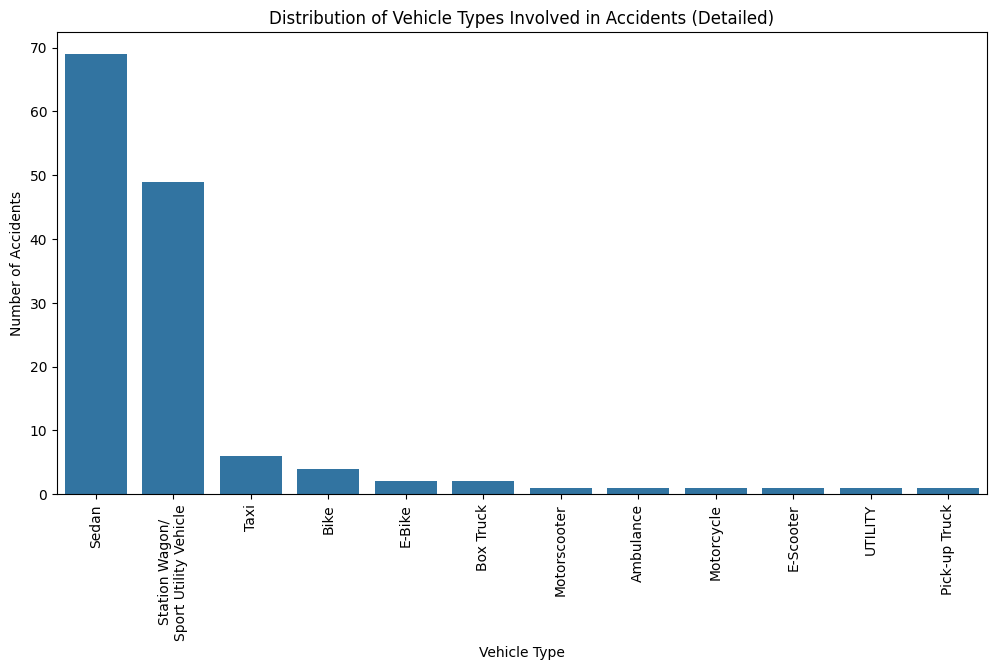

In [25]:
## Distribution of vehicle_type (detailed)

plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type_code_1', data=df, order=df['vehicle_type_code_1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents (Detailed)')
plt.show()

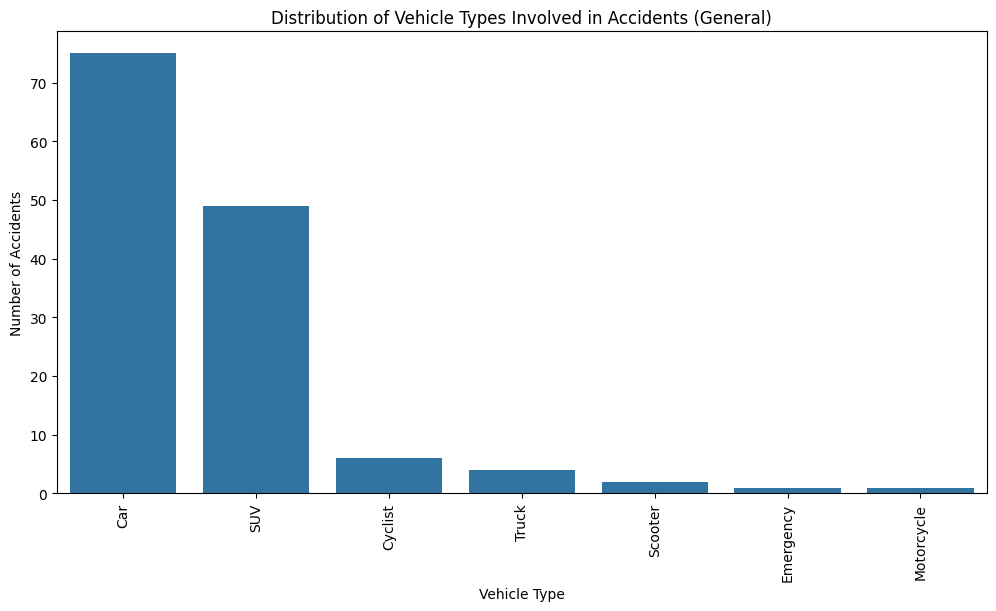

In [27]:
## Distribution of vehicle_type (general)
vehicle_type_mapping = {
    'Ambulance': 'Emergency',
    'Bike': 'Cyclist',
    'Box Truck': 'Truck',
    'E-Bike': 'Cyclist',
    'E-Scooter': 'Scooter',
    'Motorcycle': 'Motorcycle',
    'Motorscooter': 'Scooter',
    'Pick-up Truck': 'Truck',
    'Sedan': 'Car',
    'Station Wagon/\nSport Utility Vehicle': 'SUV',
    'Taxi': 'Car',
    'UTILITY': 'Truck'
}

df['vehicle_type_group'] = df['vehicle_type_code_1'].replace(vehicle_type_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type_group', data=df, order=df['vehicle_type_group'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents (General)')
plt.savefig('../static/images/distribution_vehicle_type.png')
plt.show()

C:\Windows\Temp\ipykernel_34704\3651044103.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0],
C:\Windows\Temp\ipykernel_34704\3651044103.py:15: UserWarning: The palette list has more values (12) than needed (7), which may not be intended.
  sns.countplot(ax=axes[0],
C:\Windows\Temp\ipykernel_34704\3651044103.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1],


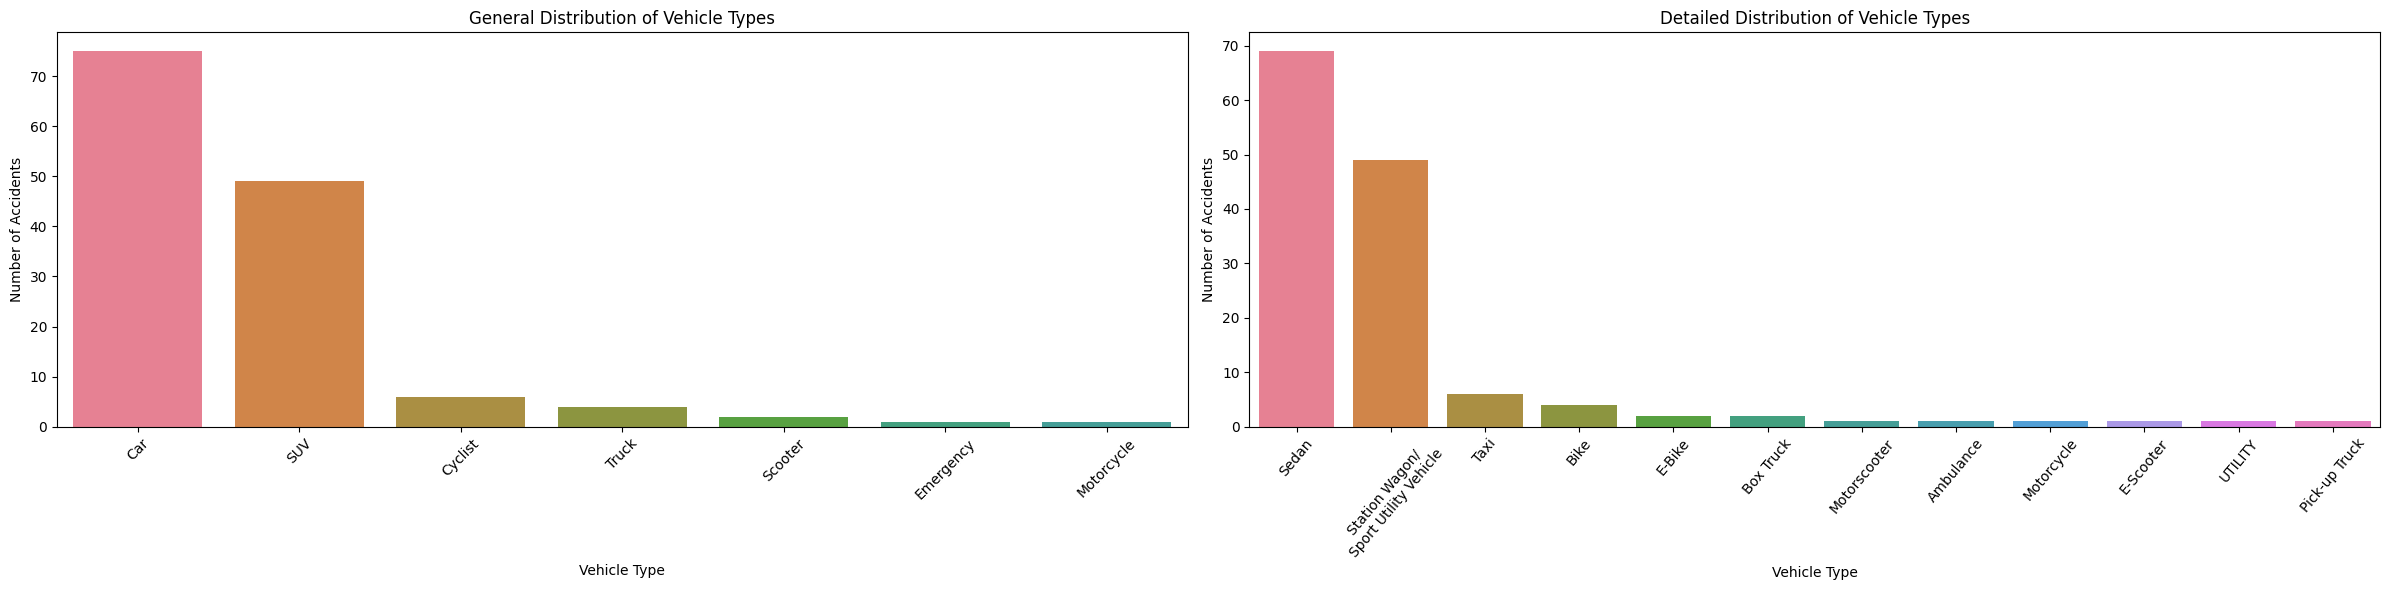

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply your mapping
df['vehicle_type_group'] = df['vehicle_type_code_1'].replace(vehicle_type_mapping)

# Set up the matplotlib figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define a color palette
max_categories = max(df['vehicle_type_group'].nunique(), df['vehicle_type_code_1'].nunique())
palette = sns.color_palette("husl", max_categories)

# First subplot for the general distribution
sns.countplot(ax=axes[0],
              x='vehicle_type_group',
              data=df,
              order=df['vehicle_type_group'].value_counts().index,
              dodge=False,
              palette=palette)
axes[0].set_title('General Distribution of Vehicle Types')
axes[0].set_xlabel('Vehicle Type')
# adjust x-axis label position
axes[0].xaxis.labelpad = 45
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot for the detailed distribution
sns.countplot(ax=axes[1],
              x='vehicle_type_code_1',
              data=df,
              order=df['vehicle_type_code_1'].value_counts().index,
              dodge=False,
              palette=palette)
axes[1].set_title('Detailed Distribution of Vehicle Types')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Number of Accidents')
axes[1].tick_params(axis='x', rotation=50)

# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

# Save the figure if needed
plt.savefig('../static/images/distribution_vehicle_type_comparison.png')

# Display the plots
plt.show()


C:\Windows\Temp\ipykernel_34704\223289156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='crash_day_of_week', data=df, palette='viridis')
C:\Windows\Temp\ipykernel_34704\223289156.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='crash_hour_category', data=df, order=hour_category_order, palette='viridis')


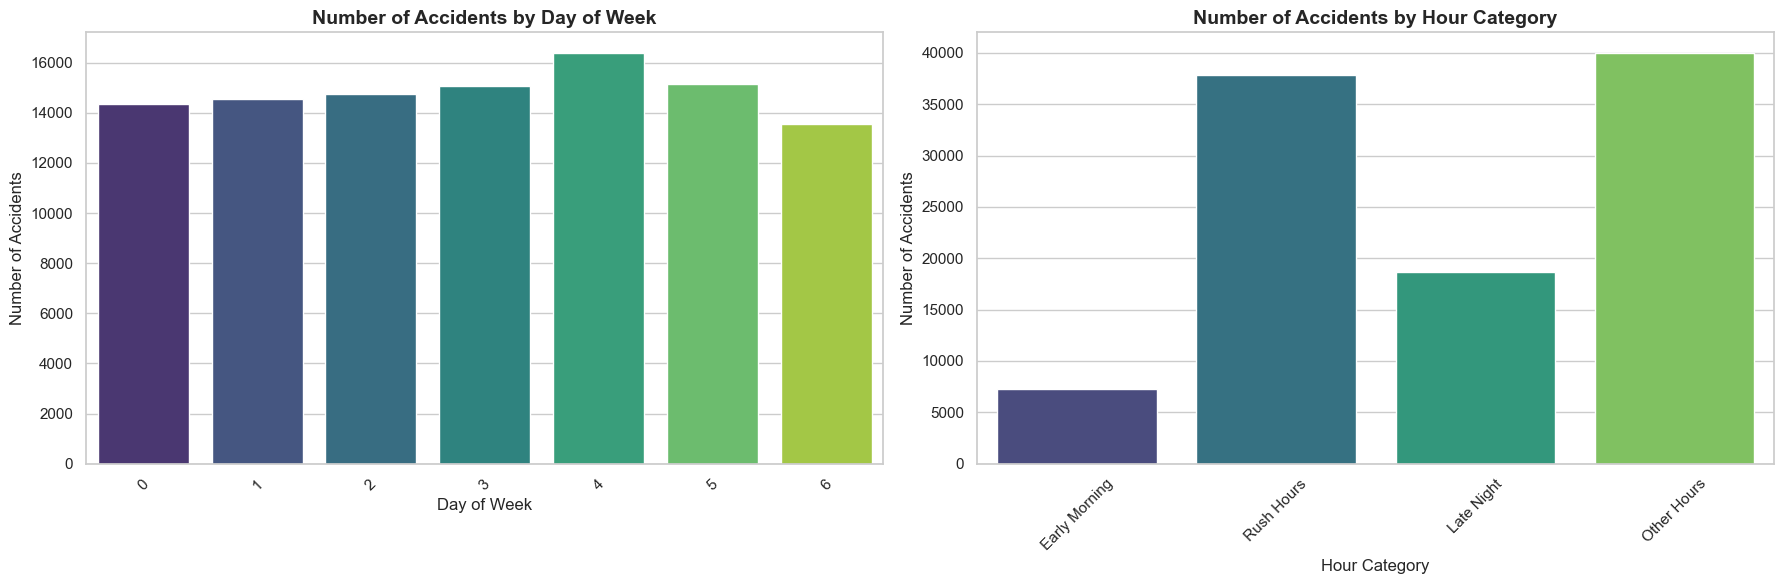

In [39]:
# Set the style of seaborn to 'whitegrid' for a professional look
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# First subplot for the number of accidents by day of the week
sns.countplot(ax=axes[0], x='crash_day_of_week', data=df, palette='viridis')
axes[0].set_title('Number of Accidents by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Number of Accidents', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Second subplot for the number of accidents by hour category
hour_category_order = ['Early Morning', 'Rush Hours', 'Late Night', 'Other Hours']
sns.countplot(ax=axes[1], x='crash_hour_category', data=df, order=hour_category_order, palette='viridis')
axes[1].set_title('Number of Accidents by Hour Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour Category', fontsize=12)
axes[1].set_ylabel('Number of Accidents', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

# Save the figure if needed
plt.savefig('../static/images/accidents_by_time_analysis.png', dpi=300)

# Display the plots
plt.show()

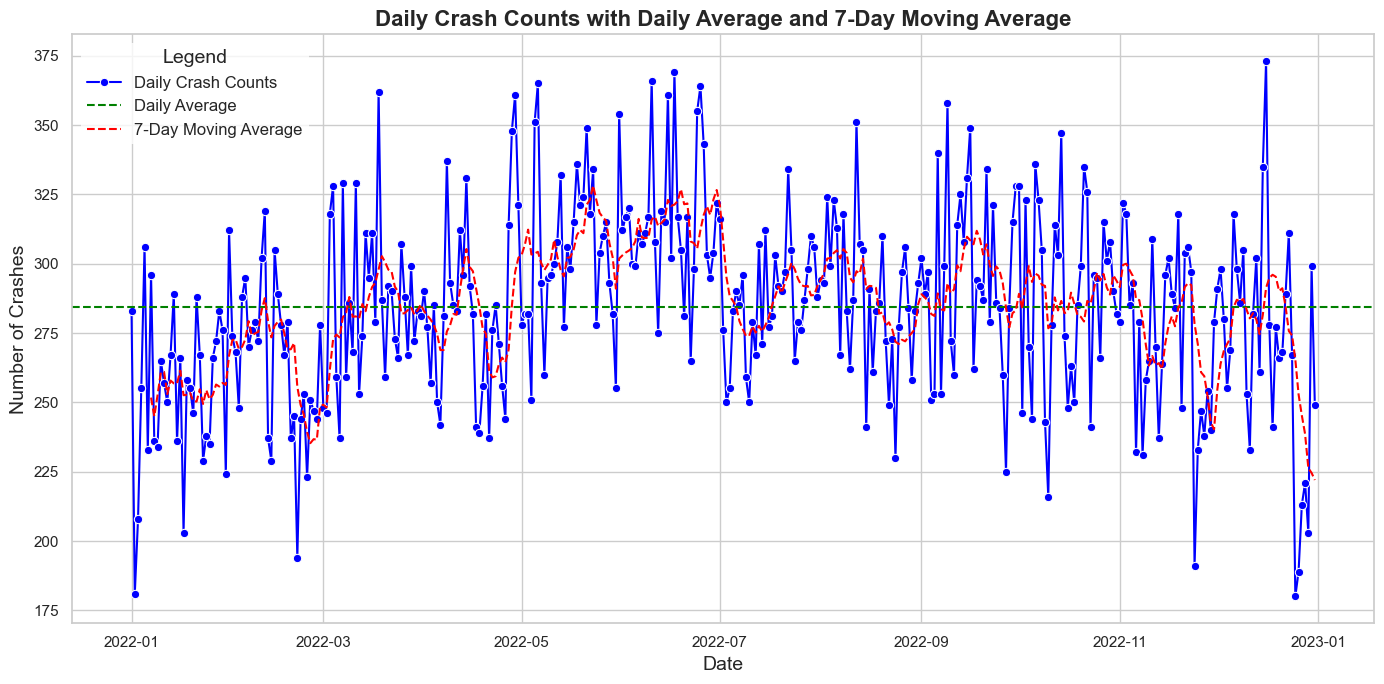

In [43]:
# Setting a professional theme with seaborn
sns.set_theme(style="whitegrid")

# Assuming 'crash_datetime' is in datetime format in 'df'
# Calculate the daily crash counts
daily_counts = df.groupby(df['crash_datetime'].dt.date).size()

# Compute the overall daily average
daily_avg = daily_counts.mean()

# Calculate the 7-day moving average
moving_avg_7d = daily_counts.rolling(window=7).mean()

# Plot the daily crash counts
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_counts, marker='o', linestyle='-', label='Daily Crash Counts', color='blue')

# Plot the overall daily average
plt.axhline(y=daily_avg, color='green', linestyle='--', label='Daily Average')

# Plot the 7-day moving average
sns.lineplot(data=moving_avg_7d, color='red', linestyle='--', label='7-Day Moving Average')

# Set title and labels with increased font size for professionalism
plt.title('Daily Crash Counts with Daily Average and 7-Day Moving Average', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

# Improve layout for a better fit and to avoid cutting off labels/titles
plt.tight_layout()

# Enhance the legend with a frame and remove the frame's edge
plt.legend(title='Legend', frameon=True, edgecolor='none', fontsize=12, title_fontsize=14)

# Optionally, save the figure with high DPI for a clear, high-resolution output
plt.savefig('../static/images/daily_crash_counts.png', dpi=300)

# Show the plot
plt.show()

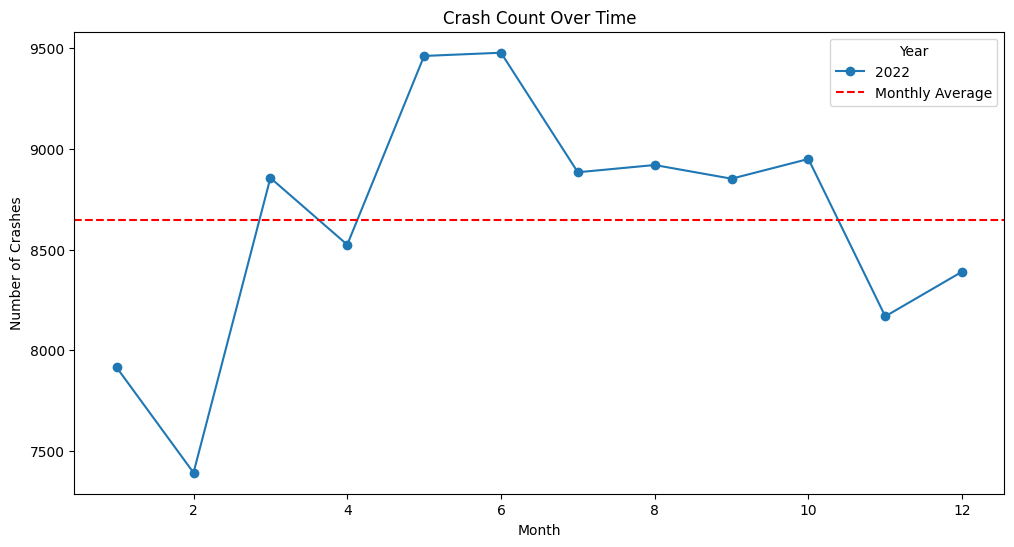

In [8]:
# seasonality by month
seasonality_data = df.pivot_table(index='month', columns='year', values='crash_datetime', aggfunc='count')
monthly_avg = df.groupby('month').size().mean()
ax= seasonality_data.plot(marker='o', figsize=(12, 6))
ax.axhline(y=monthly_avg, color='r', linestyle='--', label='Monthly Average')
plt.title('Crash Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Year')
plt.show() 

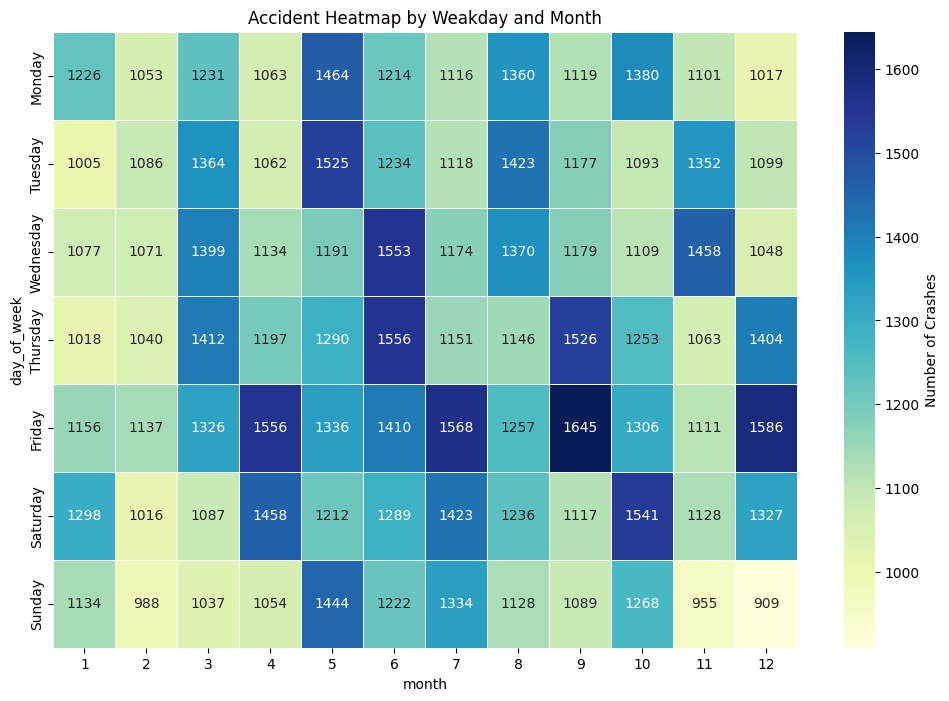

In [14]:
## heatmap - correlation between month and day for the number of crashes
# Create a pivot table to count the number of crashes for each month and day of the week
heatmap_data = df.pivot_table(index='day_of_week', columns='month', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Weakday and Month')
plt.savefig('../static/images/heatmap_by_weekday_month.png')
plt.show()

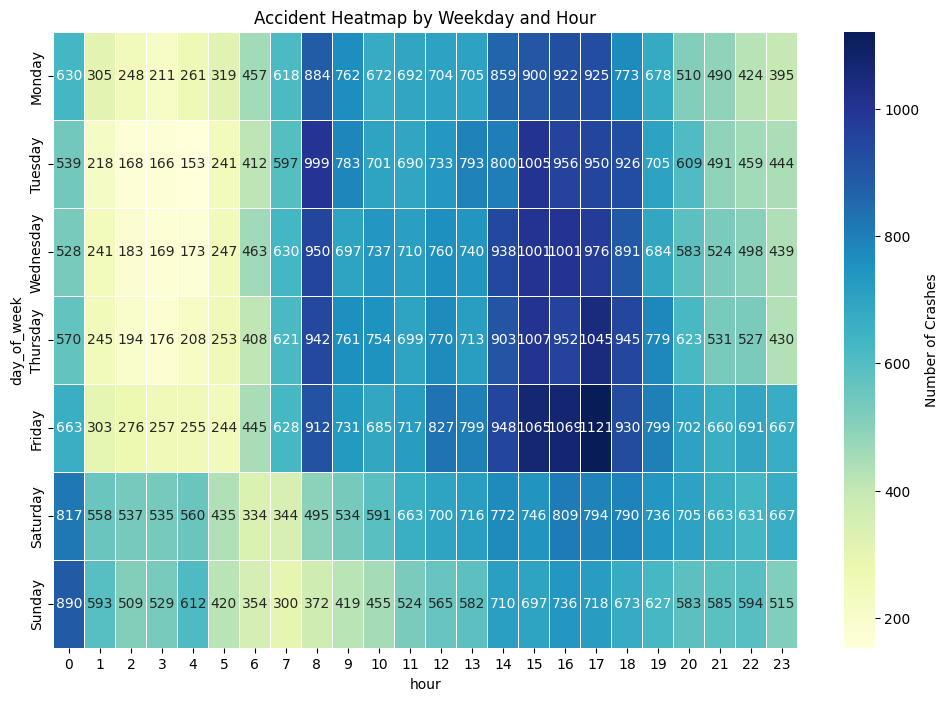

In [15]:
## heatmap - correlation between week and hour for the number of crashes
# Create a pivot table to count the number of crashes for each day of the week and hour of the day
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Weekday and Hour')
plt.savefig('../static/images/heatmap_by_weekday_hour.png')
plt.show()

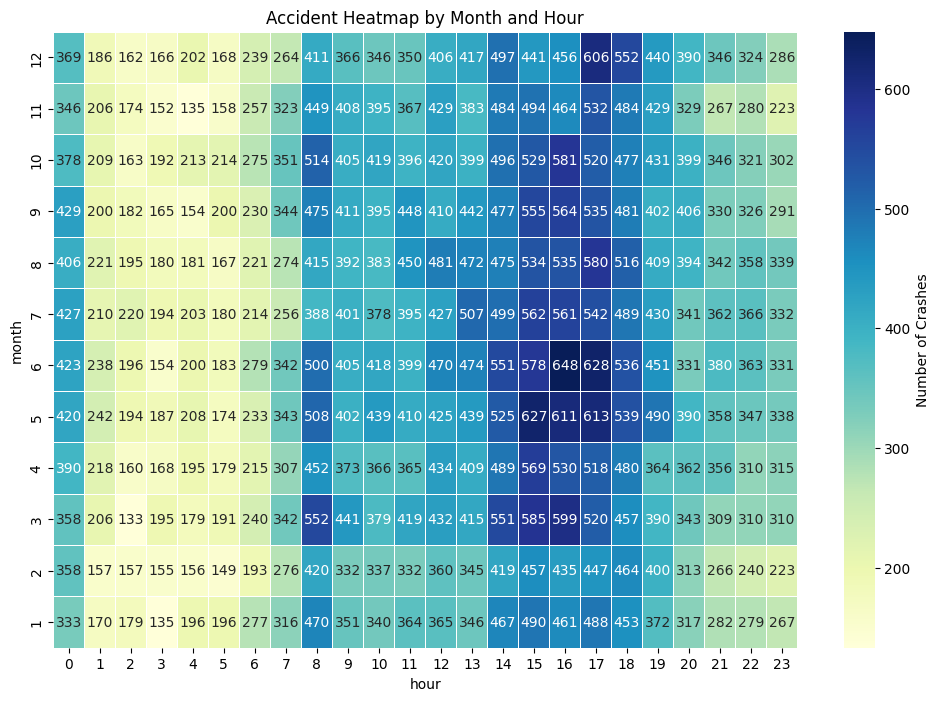

In [16]:
## heatmap - correlation between month and hour for the number of crashes
# Create a pivot table to count the number of crashes for each month and hour of the day
heatmap_data = df.pivot_table(index='month', columns='hour', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
month_order = np.arange(12,0,-1)
heatmap_data = heatmap_data.reindex(month_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Month and Hour')
plt.savefig('../static/images/heatmap_by_month_hour.png')
plt.show()